In [2]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import numpy as np
import json
import os
import datetime
import pytz
import matplotlib.pyplot as plt
from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame

In [3]:
%matplotlib inline

In [4]:
graph_files = os.listdir()
graph_files = [g for g in graph_files if g.endswith('.graphml')]

In [5]:
graph_files

['2016-07-21T15:00:00Z_1h_allCams-97_0.97conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-93_0.93conf_212dist_3ilen.graphml',
 '3h_0.99conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-100_1.0conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-94_0.94conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-99_0.99conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-90_0.9conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-96_0.96conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-95_0.95conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-98_0.98conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-91_0.91conf_212dist_3ilen.graphml',
 '2016-07-21T15:00:00Z_1h_allCams-92_0.92conf_212dist_3ilen.graphml']

# Network Analysis - Example: One hour Network
* Confidence 0.99, 212px radius, 3 frames as intractionlength.
* hour-Networks 21.07.2016
* cutoff 10
* gap size 2
* '2016-07-21T15:00:00Z_1h_allCams-99_0.99conf_212dist_3ilen.graphml'

In [ ]:
# graph_list = []

# for eg in graph_files:
#     G = nx.read_graphml(eg)
#     date = eg.split("_")[0]
#     date_dt = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
#     date_ts = date_dt.timestamp()
#     graph_list.append((date_dt,G))

# G = graph_list[0][1]

In [6]:
G = nx.read_graphml('3h_0.99conf_212dist_3ilen.graphml')

## Global Properties

### Nodes, Edges, average Degree and Density

In [7]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1126
Number of edges: 153749
Average degree: 273.0888


In [8]:
Series(G.degree()).mean()

273.08880994671404

In [9]:
density = nx.density(G)
density

0.24274560884152357

### Degree distribution

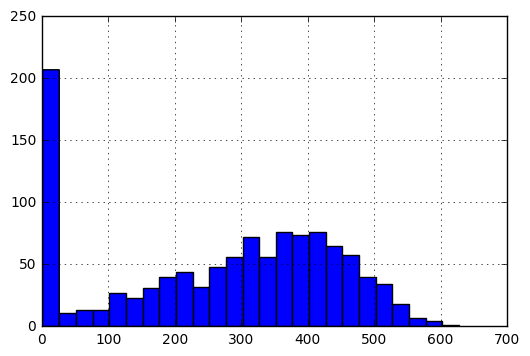

In [10]:
degrees = G.degree().values()
s = Series(list(degrees))
s.hist(bins=25)

In [11]:
s.describe()

count    1126.000000
mean      273.088810
std       169.492353
min         1.000000
25%       138.250000
50%       310.500000
75%       410.000000
max       628.000000
dtype: float64

### Edge weights distribution

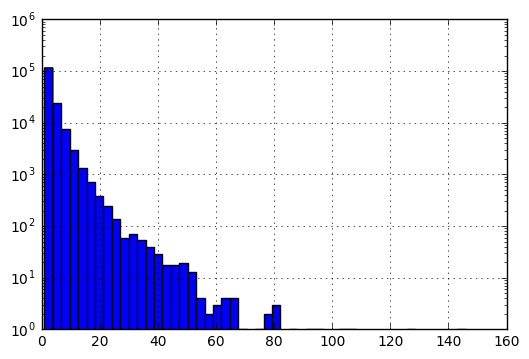

In [12]:
l = []

for e in G.edges():
    l.append(G.get_edge_data(e[0],e[1]).get("frequency"))
    # totalduration

edge_weights = Series(l)

fig, ax = plt.subplots()
ax.set_yscale('log')
edge_weights.hist(bins=50)

In [13]:
edge_weights.describe()

count    153749.000000
mean          2.969483
std           3.463152
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         146.000000
dtype: float64

### Weighted Degree Distribution

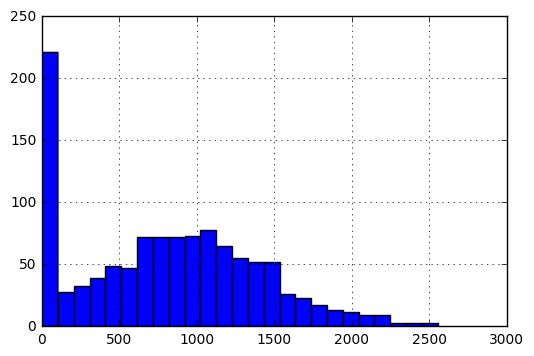

In [14]:
degrees = G.degree(weight='frequency').values()
#degrees = G.degree(weight='totalduration').values()
s = Series(list(degrees))
s.hist(bins=25)

### Number of components and size distribution

In [15]:
Gcc = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("Number of components: {}".format(len(Gcc)))

size_components = []
for comp in Gcc:
    size_components.append(nx.number_of_nodes(comp))
    
Counter(list(size_components))

Number of components: 1


Counter({1126: 1})

In [16]:
# keepthe biggest Component
G = Gcc[0]

There is one big component!

### Diameter

In [17]:
diameter = nx.diameter(G)
print("Diameter: {}".format(diameter))

Diameter: 4


### Global clustering coefficient

In [18]:
cc = nx.average_clustering(G)
cc

0.4944599204257412

### Average shortest path length

In [19]:
average_shortest_path = nx.average_shortest_path_length(G)

In [20]:
print("Average shortest path: {}".format(average_shortest_path))

Average shortest path: 1.8802210380895994


## Compare to Random Graph Model
* degree distribution (not biniminal/poisson) - ja sieht nicht binominalverteilt aus, sieht ziemlich nach scale free, wenige hubs, viele knote mit wenig links
* connectedness (giant component) - ja sieht ziemlich verbunden aus alles, gibt nur eine große komponente
* average path length (~diameter) - ist hier auch ziemlich klein, Small-world phenomenon, $d = \frac{\ln nodes}{\ln av degree}$
* clustering coefficient - müsste höher sein als bei einem random network, jep ist es auch

In [21]:
random_g = nx.erdos_renyi_graph(n=nx.number_of_nodes(G), p=density)
nx.info(random_g)

'Name: gnp_random_graph(1126,0.24274560884152357)\nType: Graph\nNumber of nodes: 1126\nNumber of edges: 153959\nAverage degree: 273.4618'

In [22]:
nx.average_clustering(random_g)

0.24306381574340888

In [23]:
nx.average_clustering(G)

0.4944599204257412

## Local Structure (node level metrics)

### Betweennes Centrality

In [24]:
bc = nx.betweenness.betweenness_centrality(G)

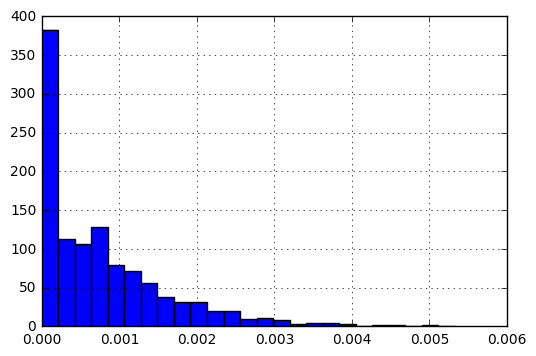

In [25]:
Series(bc).hist(bins = 25)

### Degree Centrality

In [26]:
dc = nx.degree_centrality(G)

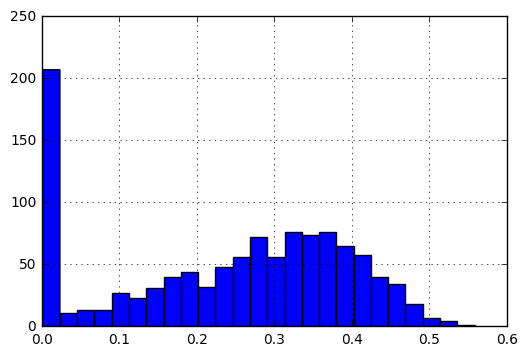

In [27]:
Series(dc).hist(bins = 25)

### Closeness Centrality

In [28]:
closenessc = nx.closeness.closeness_centrality(G)

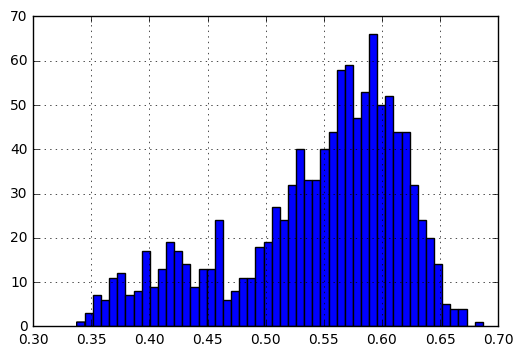

In [30]:
Series(closenessc).hist(bins=50)

# Plot Closeness and Age

In [35]:
import hatching as ht

In [36]:
start = "2016-07-21T15:00:00Z"
start_dt = datetime.datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)

In [44]:
def getAges(g, date_dt):
    aa = ht.get_all_bees_age(date_dt)
    df = DataFrame([int(x) for x in list(g.nodes())], columns=['id'])
    df["age"] = df.id.apply(lambda x: aa.iloc[x].age)
    return df

In [51]:
def addCentrality(df, g):
    closenessC = nx.closeness_centrality(g)
    df['closeness'] = df.id.apply(lambda x: closenessC.get(str(x)))
    return df

In [47]:
df = getAges(G, start_dt)

In [53]:
df = addCentrality(df,G)

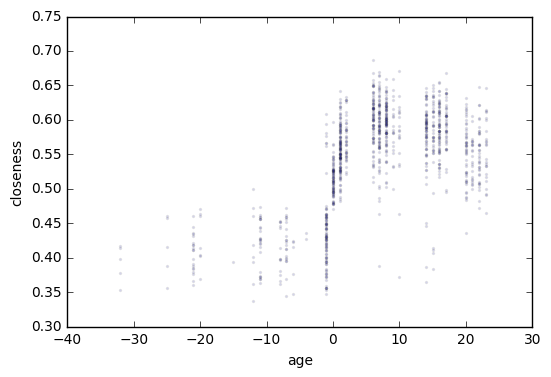

In [60]:
df.plot.scatter(x='age', y='closeness', s=2, alpha=0.1)

# Remove Nodes with low closeness